<a href="https://colab.research.google.com/github/leonardodibari/prova/blob/main/genetic_code_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
# Dictionary mapping codons to amino acids
codon_to_amino_acid = {
    "AAA": "Lys", "AAC": "Asn", "AAG": "Lys", "AAT": "Asn",
    "ACA": "Thr", "ACC": "Thr", "ACG": "Thr", "ACT": "Thr",
    "AGA": "Arg", "AGC": "Ser", "AGG": "Arg", "AGT": "Ser",
    "ATA": "Ile", "ATC": "Ile", "ATG": "Met", "ATT": "Ile",
    "CAA": "Gln", "CAC": "His", "CAG": "Gln", "CAT": "His",
    "CCA": "Pro", "CCC": "Pro", "CCG": "Pro", "CCT": "Pro",
    "CGA": "Arg", "CGC": "Arg", "CGG": "Arg", "CGT": "Arg",
    "CTA": "Leu", "CTC": "Leu", "CTG": "Leu", "CTT": "Leu",
    "GAA": "Glu", "GAC": "Asp", "GAG": "Glu", "GAT": "Asp",
    "GCA": "Ala", "GCC": "Ala", "GCG": "Ala", "GCT": "Ala",
    "GGA": "Gly", "GGC": "Gly", "GGG": "Gly", "GGT": "Gly",
    "GTA": "Val", "GTC": "Val", "GTG": "Val", "GTT": "Val",
    "TAA": "Stop", "TAC": "Tyr", "TAG": "Stop", "TAT": "Tyr",
    "TCA": "Ser", "TCC": "Ser", "TCG": "Ser", "TCT": "Ser",
    "TGA": "Stop", "TGC": "Cys", "TGG": "Trp", "TGT": "Cys",
    "TTA": "Leu", "TTC": "Phe", "TTG": "Leu", "TTT": "Phe",
    # You can continue adding more codon-to-amino-acid mappings here
}

# Accessing the amino acid for a specific codon
print("Amino acid for codon 'AAA' is:", codon_to_amino_acid["AAA"])


Amino acid for codon 'AAA' is: Lys


In [7]:
def generate_codons():
    bases = ['A', 'C', 'G', 'T']
    codons = []
    for base1 in bases:
        for base2 in bases:
            for base3 in bases:
                codon = base1 + base2 + base3
                codons.append(codon)
    return codons

def single_mutation(codon1, codon2):
    # Check if two codons differ by only one nucleotide
    count = sum(c1 != c2 for c1, c2 in zip(codon1, codon2))
    return count == 1

def create_codon_graph():
    codons = generate_codons()
    G = nx.Graph()

    for codon1 in codons:
        for codon2 in codons:
            if single_mutation(codon1, codon2):
                G.add_edge(codon1, codon2)

    return G


def assign_edge_weights(graph):
    for u, v in graph.edges():
        weight = calculate_edge_weight(u, v)
        graph[u][v]['weight'] = weight

def calculate_edge_weight(codon1, codon2):
    # Check if the codons are synonymous
    if codon_to_amino_acid[codon1] == codon_to_amino_acid[codon2]:
        return 0.1  # Codons are synonymous
    return 1  # Codons are not synonymous

# Create the graph of codons
codon_graph = create_codon_graph()

# Assign edge weights to the graph based on synonymous or non-synonymous codons
assign_edge_weights(codon_graph)

# Visualize or perform further analysis with the graph, such as printing edge weights
# For example:
for u, v, data in codon_graph.edges(data=True):
    print(f"Edge ({u}, {v}) has weight: {data['weight']}")

# Visualize or perform further analysis with the generated graph
# For example:
print("Number of nodes (codons) in the graph:", codon_graph.number_of_nodes())
print("Number of edges in the graph:", codon_graph.number_of_edges())


Edge (AAA, AAC) has weight: 1
Edge (AAA, AAG) has weight: 0.1
Edge (AAA, AAT) has weight: 1
Edge (AAA, ACA) has weight: 1
Edge (AAA, AGA) has weight: 1
Edge (AAA, ATA) has weight: 1
Edge (AAA, CAA) has weight: 1
Edge (AAA, GAA) has weight: 1
Edge (AAA, TAA) has weight: 1
Edge (AAC, AAG) has weight: 1
Edge (AAC, AAT) has weight: 0.1
Edge (AAC, ACC) has weight: 1
Edge (AAC, AGC) has weight: 1
Edge (AAC, ATC) has weight: 1
Edge (AAC, CAC) has weight: 1
Edge (AAC, GAC) has weight: 1
Edge (AAC, TAC) has weight: 1
Edge (AAG, AAT) has weight: 1
Edge (AAG, ACG) has weight: 1
Edge (AAG, AGG) has weight: 1
Edge (AAG, ATG) has weight: 1
Edge (AAG, CAG) has weight: 1
Edge (AAG, GAG) has weight: 1
Edge (AAG, TAG) has weight: 1
Edge (AAT, ACT) has weight: 1
Edge (AAT, AGT) has weight: 1
Edge (AAT, ATT) has weight: 1
Edge (AAT, CAT) has weight: 1
Edge (AAT, GAT) has weight: 1
Edge (AAT, TAT) has weight: 1
Edge (ACA, ACC) has weight: 0.1
Edge (ACA, ACG) has weight: 0.1
Edge (ACA, ACT) has weight: 0.1


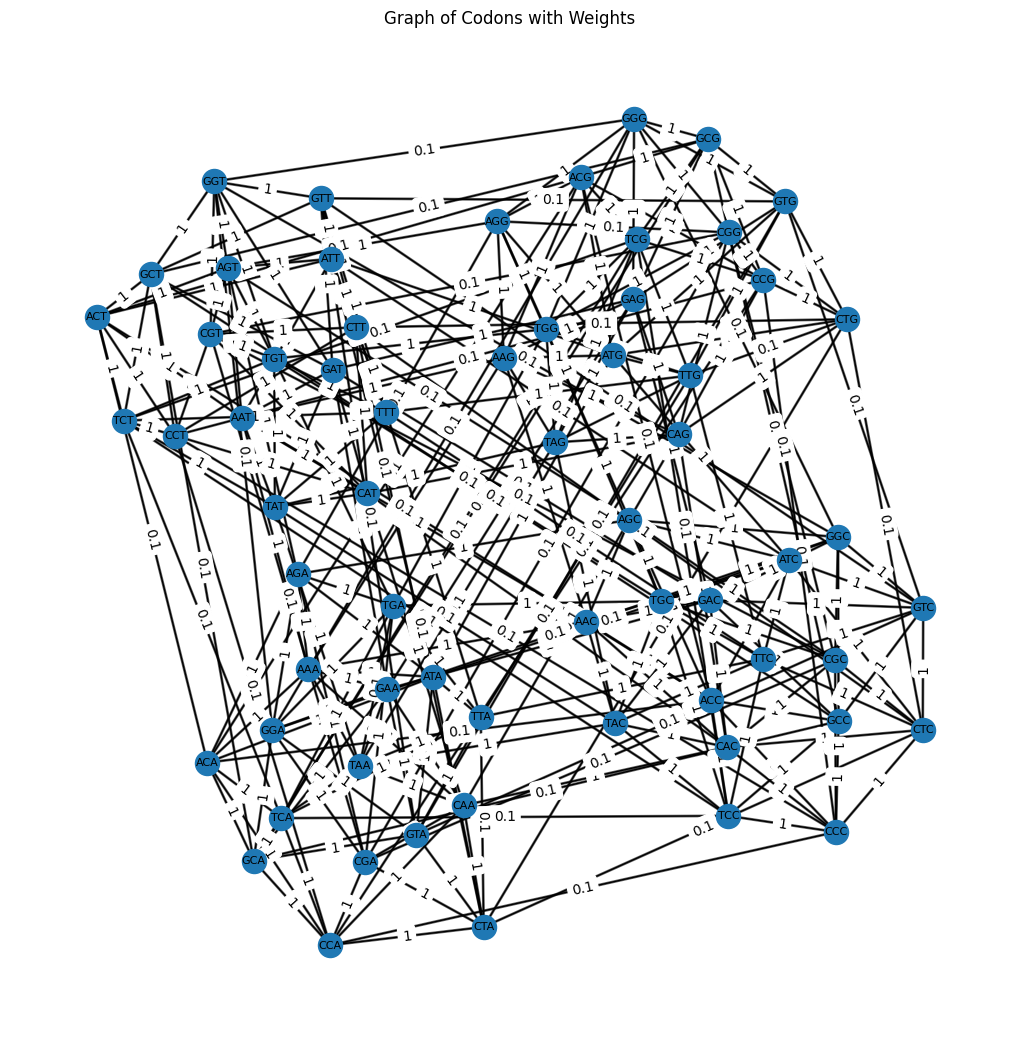

In [9]:
def visualize_weighted_graph(graph):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, seed=42)

    # Extracting edge weights from the graph
    edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]

    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_size=300, font_size=8)
    nx.draw_networkx_edges(graph, pos, width=2.0, alpha=0.6)  # Drawing edges with increased width
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"{graph[u][v]['weight']}" for u, v in graph.edges()})

    plt.title('Graph of Codons with Weights')
    plt.axis('off')
    plt.show()

visualize_weighted_graph(codon_graph)

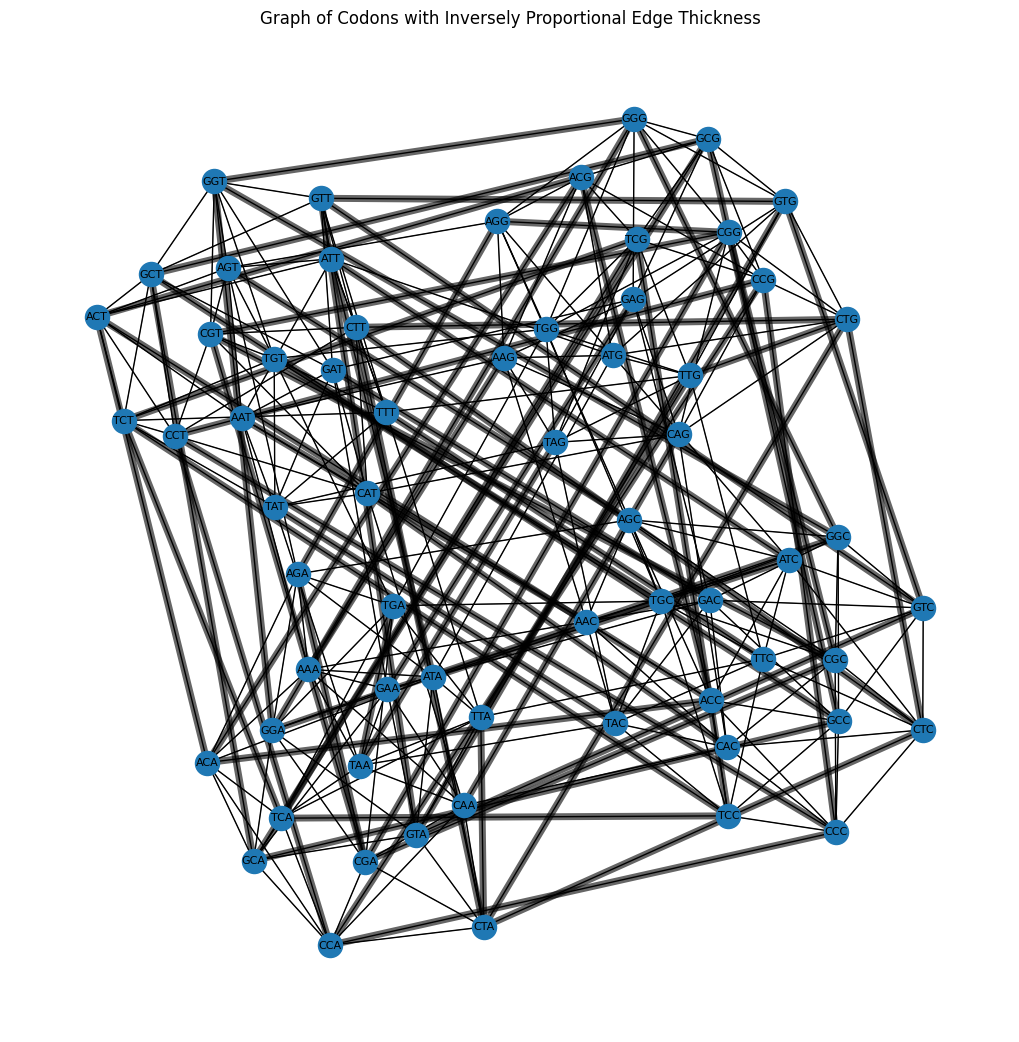

In [10]:
def visualize_weighted_graph_inverse_proportional(graph):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, seed=42)

    # Extracting edge weights from the graph
    edge_weights = [1 / graph[u][v]['weight'] for u, v in graph.edges()]

    # Normalize the inverse weights for the edge thickness
    edge_weights = [float(i) / max(edge_weights) * 5 for i in edge_weights]  # Scaled to a reasonable range (multiplying by 5 here)

    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_size=300, font_size=8)
    nx.draw_networkx_edges(graph, pos, width=edge_weights, alpha=0.6)  # Drawing edges with variable width

    plt.title('Graph of Codons with Inversely Proportional Edge Thickness')
    plt.axis('off')
    plt.show()


# Visualize the graph with inversely proportional edge thickness
visualize_weighted_graph_inverse_proportional(codon_graph)







In [15]:
# Define the two codons for which you want to find the shortest weighted path
start_codon = 'TCT'  # Replace with your desired starting codon
end_codon = 'TGA'    # Replace with your desired ending codon

# Find the shortest weighted path
try:
    shortest_path = nx.shortest_path(codon_graph, start_codon, end_codon, weight='weight')
    shortest_path_length = nx.shortest_path_length(codon_graph, start_codon, end_codon, weight='weight')

    print(f"The shortest weighted path between {start_codon} and {end_codon} is: {shortest_path}")
    print(f"The length of the shortest weighted path is: {shortest_path_length}")
except nx.NetworkXNoPath:
    print(f"No weighted path found between {start_codon} and {end_codon}")

The shortest weighted path between TCT and TGA is: ['TCT', 'TCA', 'TGA']
The length of the shortest weighted path is: 1.1
